In [2]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

warnings.filterwarnings("ignore")
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed set to {SEED}")

Seed set to 42


In [3]:
def read_csv(filepath):
    df = pd.read_csv(filepath)
    display(df.head())
    X = df.drop('target', axis=1)
    y = df['target']
    display(y.value_counts())

    print("Shape df:", df.shape)
    print("Shape X:", X.shape)
    print("Shape y:", y.shape)
    return X, y

In [ ]:
# Original Dataset
X_train, y_train = read_csv('../data/raw/raw_train.csv')
X_val, y_val = read_csv('../data/raw/raw_val.csv')
X_test, y_test = read_csv('../data/raw/raw_test.csv')

# FE Dataset
X_fe_train, y_fe_train = read_csv('../data/fe/fe_train.csv')
X_fe_val, y_fe_val = read_csv('../data/fe/fe_val.csv')
X_fe_test, y_fe_test = read_csv('../data/fe/fe_test.csv')

# Orginal + DT Dataset
X_dt_train, y_dt_train = read_csv('../data/raw/dt_train.csv')
X_dt_val, y_dt_val = read_csv('../data/raw/dt_val.csv')
X_dt_test, y_dt_test = read_csv('../data/raw/dt_test.csv')

# FE + DT Dataset
X_fe_dt_train, y_fe_dt_train = read_csv('../data/fe/dt_fe_train.csv')
X_fe_dt_val, y_fe_dt_val = read_csv('../data/fe/dt_fe_val.csv')
X_fe_dt_test, y_fe_dt_test = read_csv('../data/fe/dt_fe_test.csv')

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0,1
1,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df: (242, 14)
Shape X: (242, 13)
Shape y: (242,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-1.063621,0.400391,-0.262410,0.089984,-0.713154,0.0,1.000000,0.0,1.0,1.0,0.5,0.0,0.0,0
1,1.720848,-0.054513,1.368307,-1.809349,1.250048,1.0,1.000000,0.0,1.0,0.0,0.5,1.0,0.0,1
2,-0.061212,1.082748,-0.338257,0.664201,0.536156,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.941197,0.229802,0.040979,0.973394,-0.891627,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.495681,0.229802,-0.300333,0.487519,-0.445445,1.0,1.000000,0.0,0.0,0.0,0.5,0.0,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df: (30, 14)
Shape X: (30, 13)
Shape y: (30,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.384303,-0.168240,-0.641646,-0.837597,1.071575,1.0,1.000000,0.0,1.0,1.0,0.5,1.0,1.0,1
1,-2.288787,-0.736870,-1.286348,1.061736,-0.891627,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.829818,-0.054513,-0.357219,-0.175039,0.714629,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,1.0,0
3,-0.395349,-0.054513,0.116827,-0.042528,-0.445445,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.397757,-0.623144,-0.186562,1.945146,-0.177735,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df: (31, 14)
Shape X: (31, 13)
Shape y: (31,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_0.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,0.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,0.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,1.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,0.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df: (242, 14)
Shape X: (242, 13)
Shape y: (242,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_0.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,1.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,0.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,0.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,1.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df: (30, 14)
Shape X: (30, 13)
Shape y: (30,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_0.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,0.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,0.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,0.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,1.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,0.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df: (31, 14)
Shape X: (31, 13)
Shape y: (31,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,0.000000,-0.445445,0.458139,-0.729485,0.708371,1.0,0.5,0.0,1
1,0.0,0.333333,0.000000,-0.891627,0.230598,0.050166,0.222495,1.0,0.0,0.0,0
2,0.0,0.333333,0.333333,-0.891627,0.723605,-0.061212,0.399178,0.0,0.0,1.0,0
3,1.0,0.333333,0.000000,-0.891627,1.121803,-0.061212,0.266666,1.0,0.0,0.0,0
4,1.0,1.000000,0.000000,-0.713154,-0.167601,0.272924,-1.190962,0.0,0.5,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df: (242, 11)
Shape X: (242, 10)
Shape y: (242,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,0.0,1.000000,0.0,-0.713154,-0.262410,-1.063621,0.089984,0.0,0.5,1.0,0
1,0.0,1.000000,1.0,1.250048,1.368307,1.720848,-1.809349,1.0,0.5,0.0,1
2,1.0,0.666667,0.0,0.536156,-0.338257,-0.061212,0.664201,1.0,0.0,0.0,0
3,0.0,0.666667,0.0,-0.891627,0.040979,0.941197,0.973394,0.0,0.0,0.0,0
4,1.0,1.000000,0.0,-0.445445,-0.300333,0.495681,0.487519,1.0,0.5,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df: (30, 11)
Shape X: (30, 10)
Shape y: (30,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,1.0,1.071575,-0.641646,0.384303,-0.837597,1.0,0.5,1.0,1
1,0.0,0.000000,0.0,-0.891627,-1.286348,-2.288787,1.061736,1.0,0.0,0.0,0
2,1.0,0.666667,1.0,0.714629,-0.357219,0.829818,-0.175039,1.0,0.5,0.0,0
3,0.0,0.666667,0.0,-0.445445,0.116827,-0.395349,-0.042528,0.0,0.0,0.0,0
4,1.0,0.666667,0.0,-0.177735,-0.186562,-1.397757,1.945146,1.0,1.0,0.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df: (31, 11)
Shape X: (31, 10)
Shape y: (31,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,1.0,0.952258,0.726265,-0.445445,0.458139,-0.729485,1.0,0.0,1
1,1.0,0.0,1.0,0.082082,-0.054469,-0.891627,0.230598,0.050166,1.0,0.0,0
2,1.0,0.0,0.0,0.606839,0.099522,-0.891627,0.723605,-0.061212,0.0,0.0,0
3,0.0,0.0,1.0,0.965051,0.031766,-0.891627,1.121803,-0.061212,1.0,0.0,0
4,0.0,1.0,1.0,-0.411237,-0.859761,-0.713154,-0.167601,0.272924,0.0,0.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df: (242, 11)
Shape X: (242, 10)
Shape y: (242,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,1.0,1.0,1.0,0.524962,0.628019,-0.713154,-0.262410,-1.063621,0.0,0.0,0
1,1.0,1.0,0.0,-0.068646,-1.592443,1.250048,1.368307,1.720848,1.0,0.0,1
2,0.0,0.0,1.0,-0.348393,0.235034,0.536156,-0.338257,-0.061212,1.0,1.0,0
3,1.0,0.0,1.0,-0.621316,-0.161823,-0.891627,0.040979,0.941197,1.0,1.0,0
4,0.0,1.0,1.0,-0.652540,-0.163464,-0.445445,-0.300333,0.495681,1.0,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df: (30, 11)
Shape X: (30, 10)
Shape y: (30,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,0.0,-0.875417,-0.736915,1.071575,-0.641646,0.384303,0.0,0.0,1
1,1.0,0.0,1.0,0.624900,2.749978,-0.891627,-1.286348,-2.288787,1.0,0.0,0
2,0.0,0.0,0.0,-0.873880,-0.619566,0.714629,-0.357219,0.829818,1.0,1.0,0
3,1.0,0.0,1.0,0.317862,0.071622,-0.445445,0.116827,-0.395349,1.0,1.0,0
4,0.0,0.0,1.0,0.957741,2.141882,-0.177735,-0.186562,-1.397757,1.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df: (31, 11)
Shape X: (31, 10)
Shape y: (31,)


# Random Forest

In [9]:
def find_optimal_rf(
    X_train, y_train, n_estimators_range = range(50,501,50), cv_splits=3,
    max_depth=5, min_samples_split=2, min_samples_leaf=1,
    max_features='sqrt', bootstrap=True, class_weight=None
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []
    for n in n_estimators_range:
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=bootstrap,
            class_weight=class_weight,
            random_state=SEED,
            n_jobs=-1
        )
        cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        scores.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10,6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title('Random Forest: CV Accuracy vs. n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('CV Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f"Optimal n_estimators: {best_n} with CV Accuracy: {max(scores):.4f}")

    best_model = RandomForestClassifier(
        n_estimators=best_n,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        random_state=SEED,
        n_jobs=-1
    )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [10]:
def evaluate_val_rf(X_train, y_train, X_val, y_val, 
    n_estimators_range=range(50,501,50), cv_splits=5, max_depth=5, min_samples_split=2, min_samples_leaf=1,
    max_features='sqrt', bootstrap=True, class_weight=None
):
    print("Finding optimal n_estimators for Random Forest...")
    rf_model, best_n, cv_acc = find_optimal_rf(
        X_train, y_train, n_estimators_range=n_estimators_range, cv_splits=cv_splits, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features,
        bootstrap=bootstrap, class_weight=class_weight
    )

    val_preds = rf_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    print(f"Validation Accuracy with n_estimators={best_n}: {val_acc:.4f}")
    print("Classification Report on Validation Set:")
    print(classification_report(y_val, val_preds))
    return rf_model, val_acc, {'n_estimators': best_n}

def evaluate_test_rf(rf_model, X_test, y_test):
    test_preds = rf_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report on Test Set:")
    print(classification_report(y_test, test_preds))
    return test_acc

Finding optimal n_estimators for Random Forest...


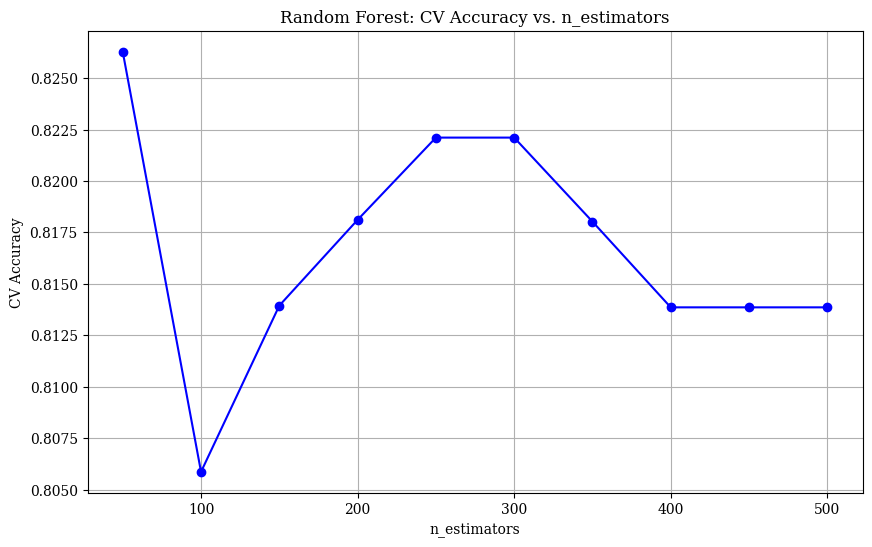

Optimal n_estimators: 50 with CV Accuracy: 0.8263
Validation Accuracy with n_estimators=50: 0.9667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.9032
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.87      0.93      0.90        14

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31

Finding optimal n_estimators for Random Forest...


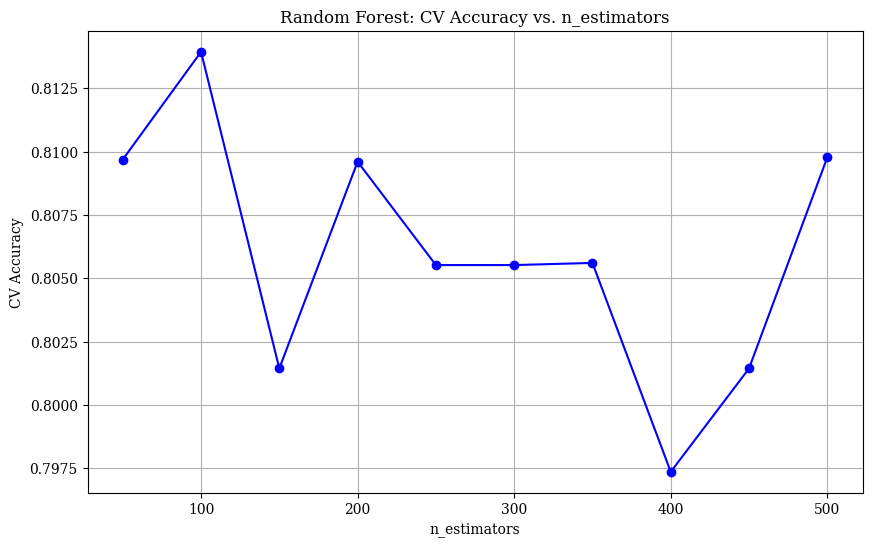

Optimal n_estimators: 100 with CV Accuracy: 0.8139
Validation Accuracy with n_estimators=100: 0.9000
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

Test Accuracy: 0.8710
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31

Finding optimal n_estimators for Random Forest...


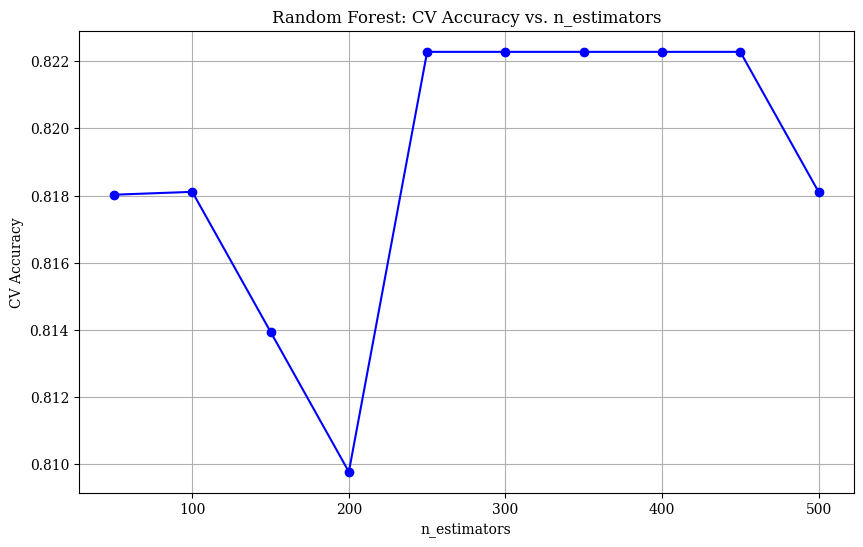

Optimal n_estimators: 250 with CV Accuracy: 0.8223
Validation Accuracy with n_estimators=250: 0.9667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Finding optimal n_estimators for Random Forest...


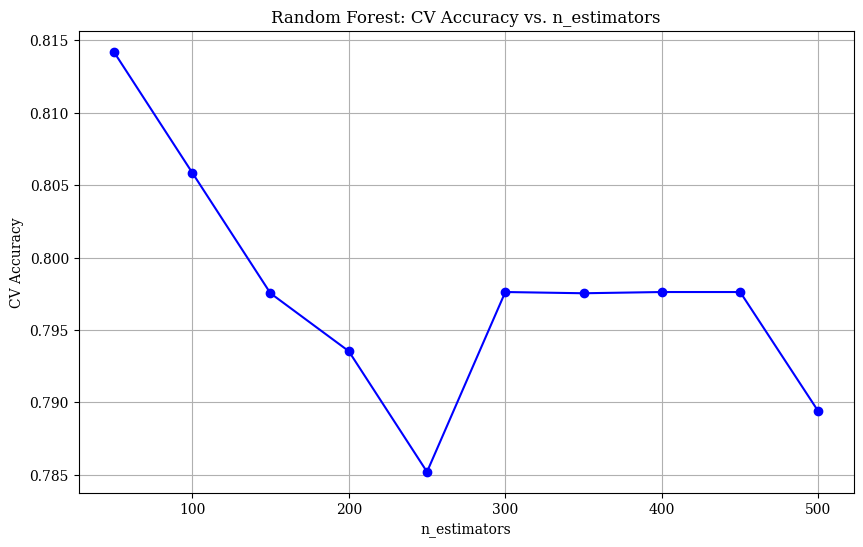

Optimal n_estimators: 50 with CV Accuracy: 0.8142
Validation Accuracy with n_estimators=50: 0.9333
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [14]:
# RF on Original Dataset
rf_model, val_acc, best_params = evaluate_val_rf(
    X_train, y_train, X_val, y_val,
)
test_acc = evaluate_test_rf(rf_model, X_test, y_test)

# RF on FE Dataset
rf_model, val_fe_acc, best_params = evaluate_val_rf(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val,
)
test_fe_acc = evaluate_test_rf(rf_model, X_fe_test, y_fe_test)

# RF on Original + DT Dataset
rf_model, val_dt_acc, best_params = evaluate_val_rf(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val,
)
test_dt_acc = evaluate_test_rf(rf_model, X_dt_test, y_dt_test)

# RF on FE + DT Dataset
rf_model, val_fe_dt_acc, best_params = evaluate_val_rf(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val,
)
test_fe_dt_acc = evaluate_test_rf(rf_model, X_fe_dt_test, y_fe_dt_test)

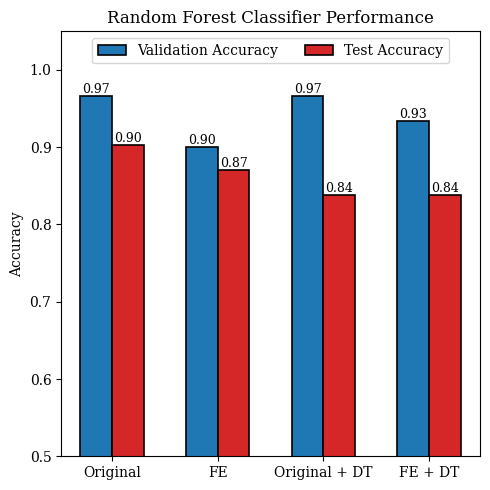

In [16]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [val_acc, val_fe_acc, val_dt_acc, val_fe_dt_acc]
test_accs = [test_acc, test_fe_acc, test_dt_acc, test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x - width/2, val_accs, width, label='Validation Accuracy', color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy', color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Classifier Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol = 2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# AdaBoost

In [17]:
def find_optimal_ada(
    X_train, y_train,
    n_estimators_range=range(50,501,50), cv_splits=3,
    learning_rate=0.1,
    base_max_depth=1,
    algorithm='SAMME'
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    for n in n_estimators_range:
        ada = AdaBoostClassifier(
            estimator = DecisionTreeClassifier(max_depth=base_max_depth, random_state=SEED),
            n_estimators=n,
            learning_rate=learning_rate,
            algorithm=algorithm,
            random_state=SEED
        )
        cv_scores = cross_val_score(
            ada, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1
        )
        scores.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10,6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Find n_estimators for AdaBoost (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('CV Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f"Optimal n_estimators: {best_n} with CV Accuracy: {max(scores):.4f}")

    best_model = AdaBoostClassifier(
        estimator = DecisionTreeClassifier(max_depth=base_max_depth, random_state=SEED),
        n_estimators=best_n,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=SEED
    )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [18]:
def evaluate_val_ada(
    X_train, y_train, X_val, y_val,
    n_estimators_range=range(50,501,50), cv_splits=3,
    learning_rate=0.1,
    base_max_depth=1,
    algorithm='SAMME'
):
    print("Finding optimal n_estimators for AdaBoost...")
    ada_model, best_n, cv_acc = find_optimal_ada(
        X_train, y_train,
        n_estimators_range=n_estimators_range,
        cv_splits=cv_splits,
        learning_rate=learning_rate,
        base_max_depth=base_max_depth,
        algorithm=algorithm
    )

    val_preds = ada_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    print(f"Validation Accuracy with n_estimators={best_n}: {val_acc:.4f}")
    print("Classification Report on Validation Set:")
    print(classification_report(y_val, val_preds))
    return ada_model, val_acc, {'n_estimators': best_n}

def evaluate_test_ada(ada_model, X_test, y_test):
    test_preds = ada_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report on Test Set:")
    print(classification_report(y_test, test_preds))
    return test_acc


Finding optimal n_estimators for AdaBoost...


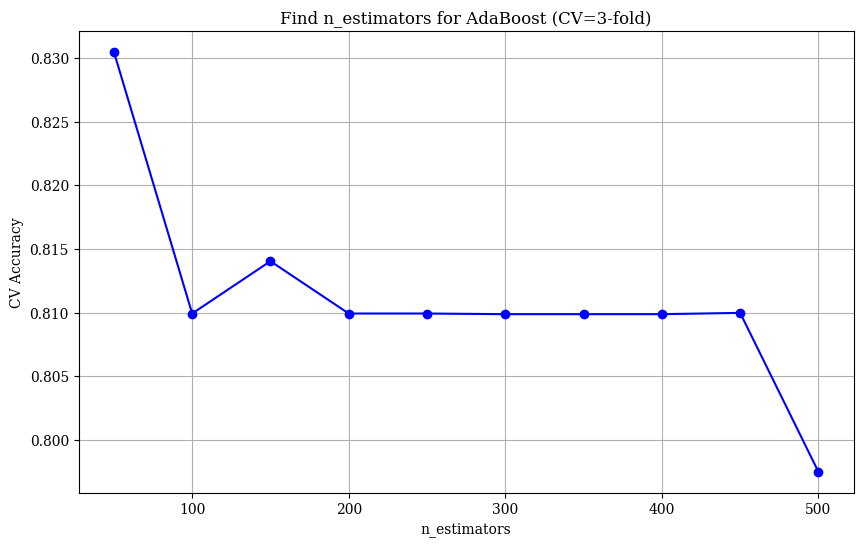

Optimal n_estimators: 50 with CV Accuracy: 0.8305
Validation Accuracy with n_estimators=50: 0.9667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.8065
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

Finding optimal n_estimators for AdaBoost...


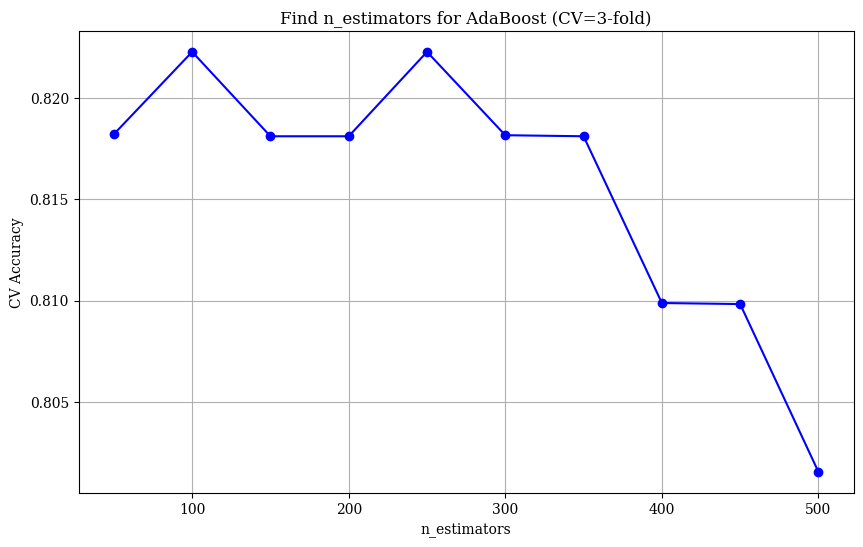

Optimal n_estimators: 100 with CV Accuracy: 0.8223
Validation Accuracy with n_estimators=100: 0.9667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Finding optimal n_estimators for AdaBoost...


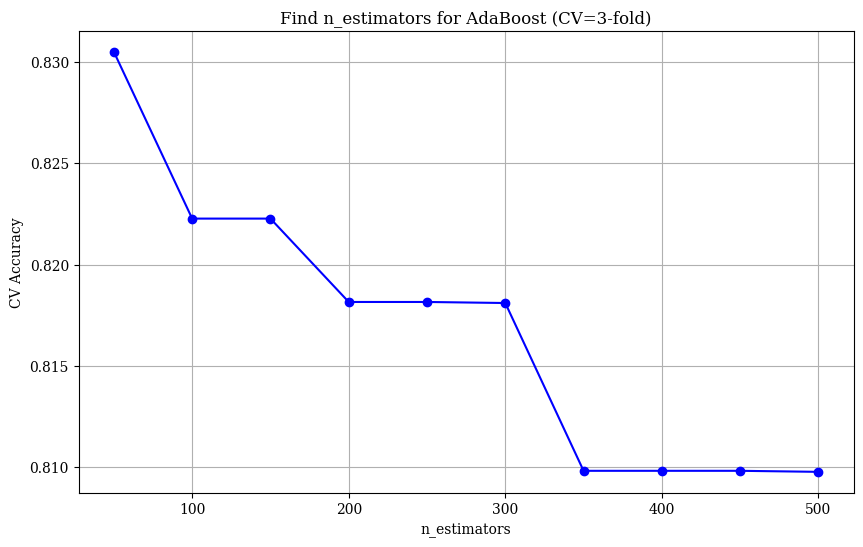

Optimal n_estimators: 50 with CV Accuracy: 0.8305
Validation Accuracy with n_estimators=50: 0.9667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.8065
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

Finding optimal n_estimators for AdaBoost...


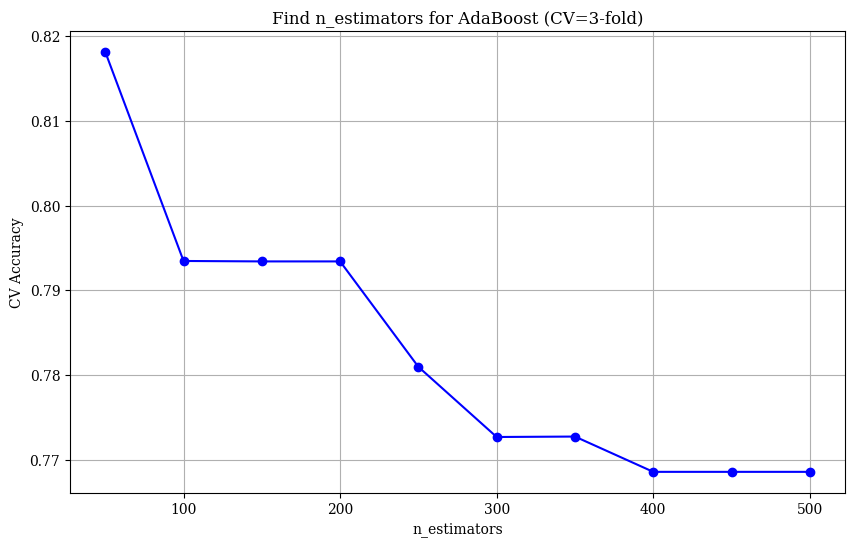

Optimal n_estimators: 50 with CV Accuracy: 0.8182
Validation Accuracy with n_estimators=50: 0.9333
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [19]:
# AdaBoost on Original Dataset
ada_model, val_acc, best_params = evaluate_val_ada(
    X_train, y_train, X_val, y_val,
)
test_acc = evaluate_test_ada(ada_model, X_test, y_test) 

# AdaBoost on FE Dataset
ada_model, val_fe_acc, best_params = evaluate_val_ada(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val,
)
test_fe_acc = evaluate_test_ada(ada_model, X_fe_test, y_fe_test)    

# AdaBoost on Original + DT Dataset
ada_model, val_dt_acc, best_params = evaluate_val_ada(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val,
)
test_dt_acc = evaluate_test_ada(ada_model, X_dt_test, y_dt_test)

# AdaBoost on FE + DT Dataset
ada_model, val_fe_dt_acc, best_params = evaluate_val_ada(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val,
)
test_fe_dt_acc = evaluate_test_ada(ada_model, X_fe_dt_test, y_fe_dt_test)

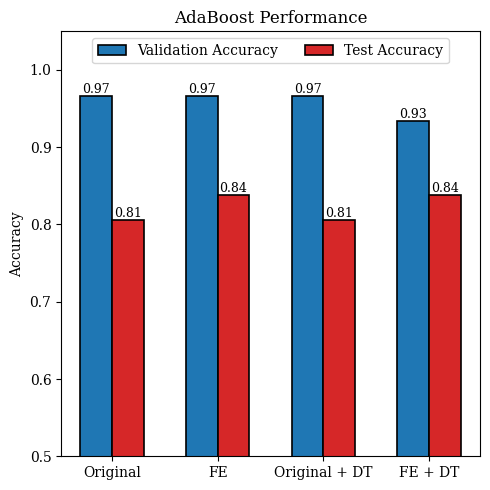

In [21]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [val_acc, val_fe_acc, val_dt_acc, val_fe_dt_acc]
test_accs = [test_acc, test_fe_acc, test_dt_acc, test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x - width/2, val_accs, width, label='Validation Accuracy', color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy', color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('AdaBoost Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol = 2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Gradient Boosting

In [22]:
def find_optimal_gb(
    X_train, y_train,
    n_estimators_range=range(50,501,50),
    cv_splits=3
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []
    for n in n_estimators_range:
        gb = GradientBoostingClassifier(
            n_estimators=n,
            random_state=SEED,
            learning_rate=0.1,
            max_depth=5,
            subsample=1.0
        )
        cv_scores = cross_val_score(gb, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        scores.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10,6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Find optimal n_estimators for Gradient Boosting (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('CV Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f"Optimal n_estimators: {best_n} with CV Accuracy: {max(scores):.4f}")

    best_model = GradientBoostingClassifier(
        n_estimators=best_n,
        random_state=SEED,
        learning_rate=0.1,
        max_depth=5,
        subsample=1.0
    )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [23]:
def evaluate_val_gb(
    X_train, y_train, X_val, y_val,
    n_estimators_range=range(50,501,50),
    cv_splits=3
):
    print("Finding optimal n_estimators for Gradient Boosting...")
    gb_model, best_n, cv_acc = find_optimal_gb(
        X_train, y_train,
        n_estimators_range=n_estimators_range,
        cv_splits=cv_splits
    )

    val_preds = gb_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    print(f"Validation Accuracy with n_estimators={best_n}: {val_acc:.4f}")
    print("Classification Report on Validation Set:")
    print(classification_report(y_val, val_preds))
    return gb_model, val_acc, {'n_estimators': best_n}

def evaluate_test_gb(gb_model, X_test, y_test):
    test_preds = gb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report on Test Set:")
    print(classification_report(y_test, test_preds))
    return test_acc

Finding optimal n_estimators for Gradient Boosting...


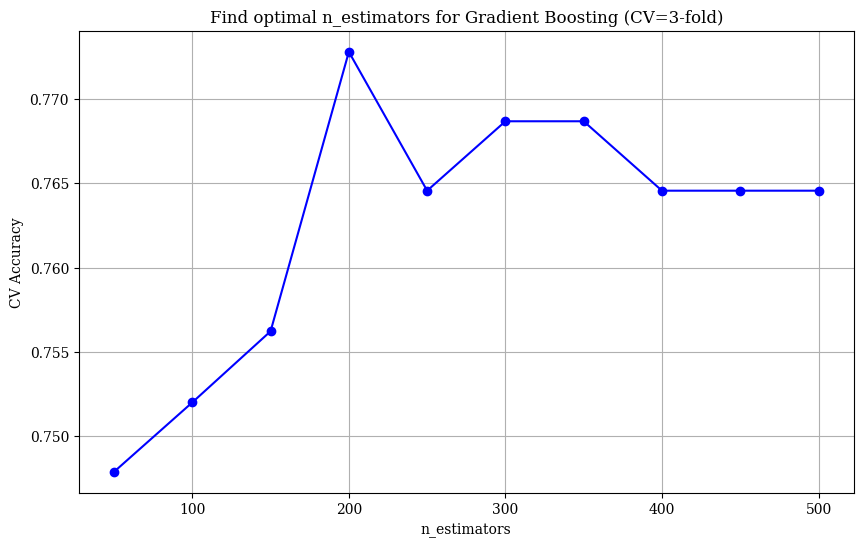

Optimal n_estimators: 200 with CV Accuracy: 0.7728
Validation Accuracy with n_estimators=200: 0.8667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.78      1.00      0.88        14

    accuracy                           0.87        30
   macro avg       0.89      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30

Test Accuracy: 0.8065
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

Finding optimal n_estimators for Gradient Boosting...


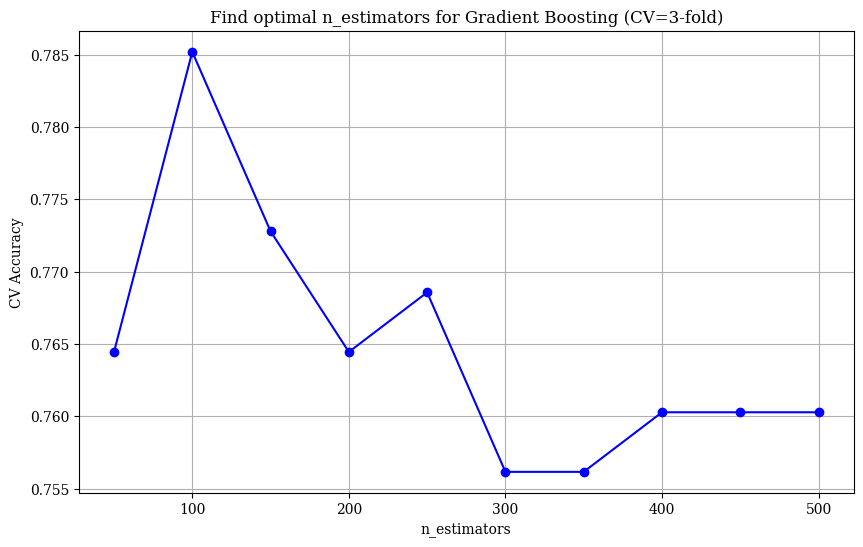

Optimal n_estimators: 100 with CV Accuracy: 0.7852
Validation Accuracy with n_estimators=100: 0.8667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.85      0.79      0.81        14

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31

Finding optimal n_estimators for Gradient Boosting...


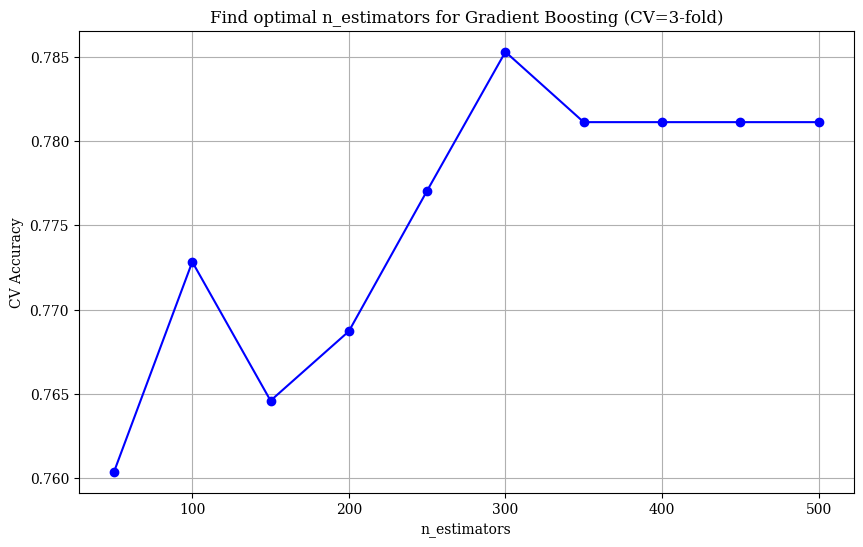

Optimal n_estimators: 300 with CV Accuracy: 0.7853
Validation Accuracy with n_estimators=300: 0.9000
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Finding optimal n_estimators for Gradient Boosting...


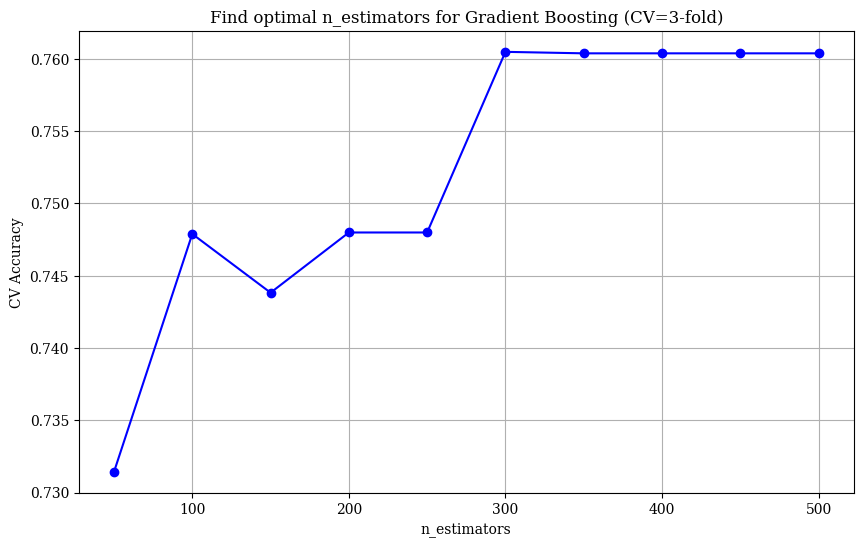

Optimal n_estimators: 300 with CV Accuracy: 0.7605
Validation Accuracy with n_estimators=300: 0.8667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.86      0.86      0.86        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [24]:
# Gradient Boosting on Original Dataset
gb_model, val_acc, best_params = evaluate_val_gb(
    X_train, y_train, X_val, y_val,
)
test_acc = evaluate_test_gb(gb_model, X_test, y_test)

# Gradient Boosting on FE Dataset
gb_model, val_fe_acc, best_params = evaluate_val_gb(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val,
)
test_fe_acc = evaluate_test_gb(gb_model, X_fe_test, y_fe_test)

# Gradient Boosting on Original + DT Dataset
gb_model, val_dt_acc, best_params = evaluate_val_gb(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val,
)
test_dt_acc = evaluate_test_gb(gb_model, X_dt_test, y_dt_test)

# Gradient Boosting on FE + DT Dataset
gb_model, val_fe_dt_acc, best_params = evaluate_val_gb(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val,
)
test_fe_dt_acc = evaluate_test_gb(gb_model, X_fe_dt_test, y_fe_dt_test)


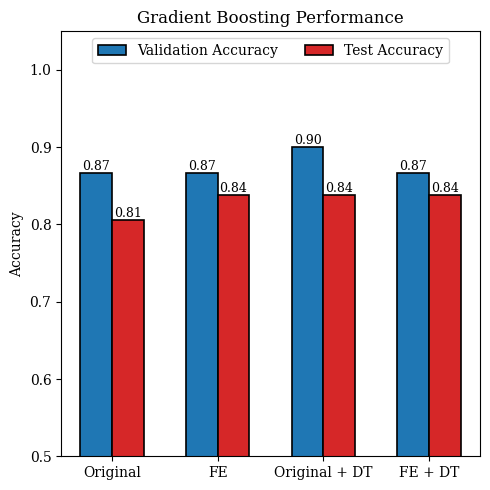

In [25]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [val_acc, val_fe_acc, val_dt_acc, val_fe_dt_acc]
test_accs = [test_acc, test_fe_acc, test_dt_acc, test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x - width/2, val_accs, width, label='Validation Accuracy', color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy', color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Gradient Boosting Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol = 2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# XGBoost

In [27]:
def find_optimal_xgb(
    X_train, y_train,
    n_estimators_range=range(50,501,50),
    cv_splits=3,
    learning_rate=0.1,
    max_depth=5,
    subsample=1.0,
    use_gpu=False
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    n_classes = len(np.unique(y_train))
    objective = 'binary:logistic' if n_classes == 2 else 'multi:softprob'
    eval_metric = 'logloss' if n_classes == 2 else 'mlogloss'

    for n in n_estimators_range:
        xgb = XGBClassifier(
            n_estimators=n,
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            objective=objective,
            eval_metric=eval_metric,
            use_label_encoder=False,
            random_state=SEED,
            n_jobs=-1,
            tree_method='gpu_hist' if use_gpu else 'hist',
            verbosity=0
        )
        cv_scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        scores.append(np.mean(cv_scores))

    plt.figure(figsize=(10,6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Find optimal n_estimators for XGBoost (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('CV Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f"Optimal n_estimators: {best_n} with CV Accuracy: {max(scores):.4f}")
    best_model = XGBClassifier(
        n_estimators=best_n,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        objective=objective,
        eval_metric=eval_metric,
        random_state=SEED,
        n_jobs=-1,
        tree_method='gpu_hist' if use_gpu else 'hist',
        verbosity=0
    )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [28]:
def evaluate_val_xgb(
    X_train, y_train, X_val, y_val,
    n_estimators_range=range(50,501,50),
    cv_splits=3,
    learning_rate=0.1,
    max_depth=5,
    subsample=1.0,
    colsample=1.0,
    use_gpu=False
):
    print("Finding optimal n_estimators for XGBoost...")
    xgb_model, best_n, cv_acc = find_optimal_xgb(
        X_train, y_train,
        n_estimators_range=n_estimators_range,
        cv_splits=cv_splits,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        use_gpu=use_gpu
    )

    val_preds = xgb_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    print(f"Validation Accuracy with n_estimators={best_n}: {val_acc:.4f}")
    print("Classification Report on Validation Set:")
    print(classification_report(y_val, val_preds))
    return xgb_model, val_acc, {'n_estimators': best_n}

def evaluate_test_xgb(xgb_model, X_test, y_test):
    test_preds = xgb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report on Test Set:")
    print(classification_report(y_test, test_preds))
    return test_acc

Finding optimal n_estimators for XGBoost...


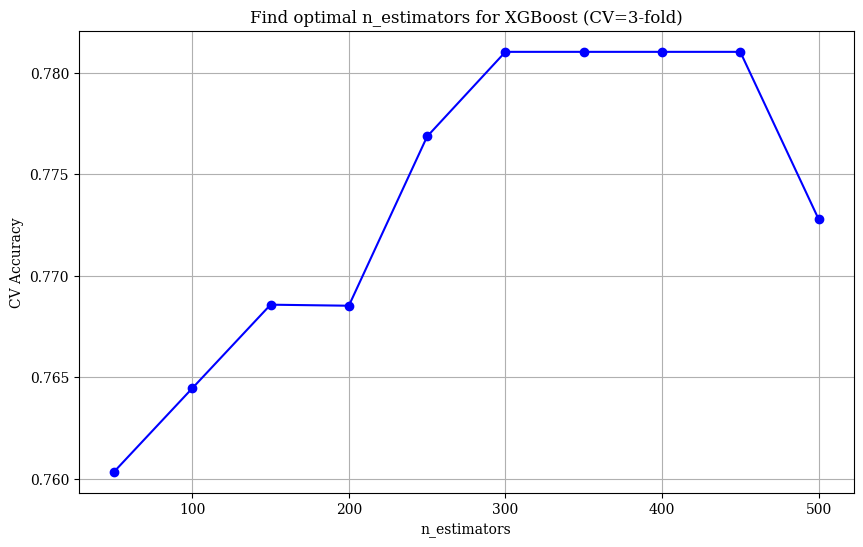

Optimal n_estimators: 300 with CV Accuracy: 0.7810
Validation Accuracy with n_estimators=300: 0.9000
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

Test Accuracy: 0.8387
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Finding optimal n_estimators for XGBoost...


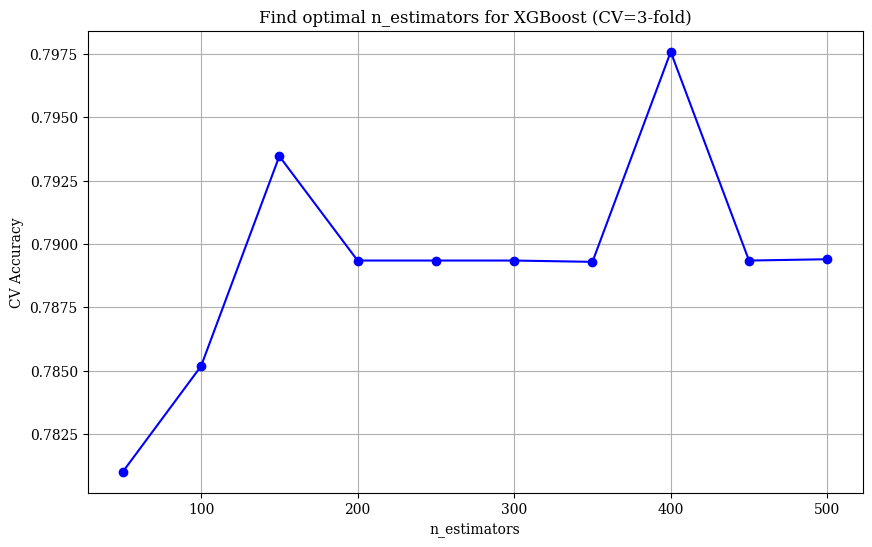

Optimal n_estimators: 400 with CV Accuracy: 0.7976
Validation Accuracy with n_estimators=400: 0.8667
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Test Accuracy: 0.8710
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.92      0.79      0.85        14

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31

Finding optimal n_estimators for XGBoost...


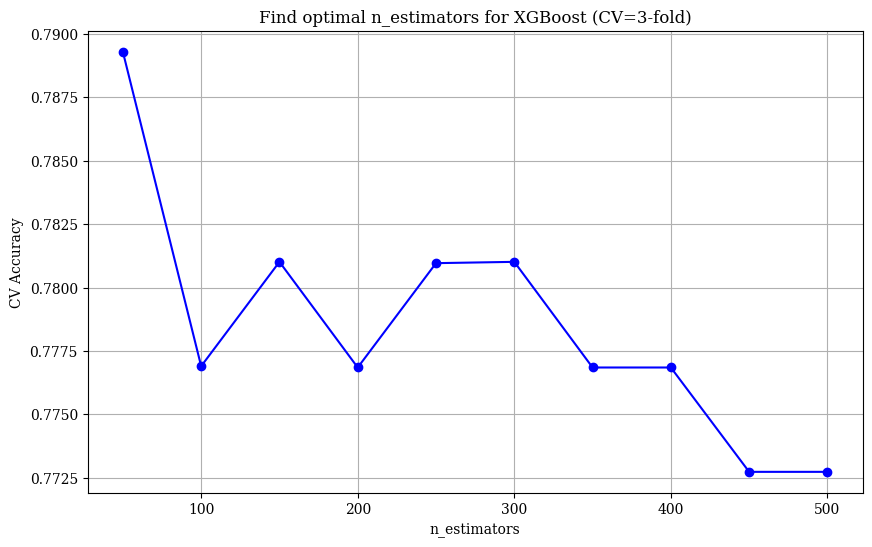

Optimal n_estimators: 50 with CV Accuracy: 0.7893
Validation Accuracy with n_estimators=50: 0.9333
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

Test Accuracy: 0.8065
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

Finding optimal n_estimators for XGBoost...


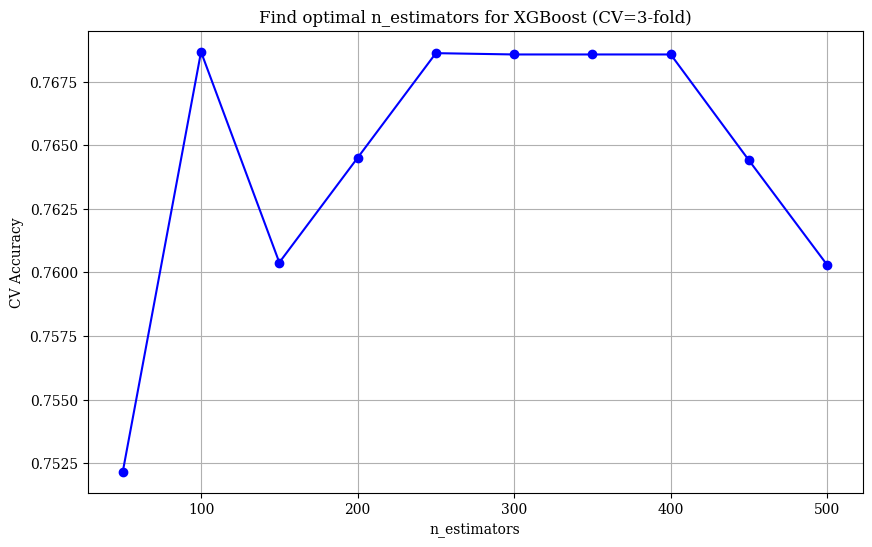

Optimal n_estimators: 100 with CV Accuracy: 0.7687
Validation Accuracy with n_estimators=100: 0.9000
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Test Accuracy: 0.8710
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.81      0.93      0.87        14

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



In [29]:
# XGBoost on Original Dataset
xgb_model, val_acc, best_params = evaluate_val_xgb(
    X_train, y_train, X_val, y_val
)
test_acc = evaluate_test_xgb(xgb_model, X_test, y_test)

# XGBoost on FE Dataset
xgb_model, val_fe_acc, best_params = evaluate_val_xgb(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
test_fe_acc = evaluate_test_xgb(xgb_model, X_fe_test, y_fe_test)

# XGBoost on Original + DT Dataset
xgb_model, val_dt_acc, best_params = evaluate_val_xgb(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
test_dt_acc = evaluate_test_xgb(xgb_model, X_dt_test, y_dt_test)

# XGBoost on FE + DT Dataset
xgb_model, val_fe_dt_acc, best_params = evaluate_val_xgb(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
test_fe_dt_acc = evaluate_test_xgb(xgb_model, X_fe_dt_test, y_fe_dt_test)

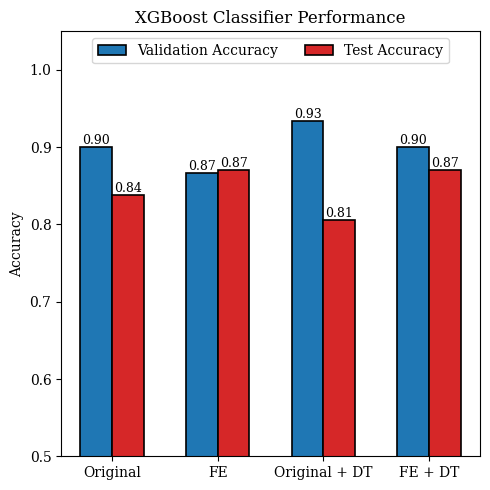

In [30]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [val_acc, val_fe_acc, val_dt_acc, val_fe_dt_acc]
test_accs = [test_acc, test_fe_acc, test_dt_acc, test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x - width/2, val_accs, width, label='Validation Accuracy', color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy', color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('XGBoost Classifier Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol = 2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()